In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip "/content/drive/MyDrive/SpeechRecogtation/audio_files.zip"
!pip install librosa
!pip install speechbrain

Archive:  /content/drive/MyDrive/SpeechRecogtation/audio_files.zip
replace 1.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: 1.txt                   
  inflating: 3.txt                   
  inflating: 3.wav                   
  inflating: 2.wav                   
  inflating: 4.txt                   
  inflating: 4.wav                   
  inflating: 1.wav                   
  inflating: 2.txt                   
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np


# Спектрограмма

In [ ]:
def spectr(y, sr=22050):
  fig, ax = plt.subplots(figsize=(12, 6))
  S = np.abs(librosa.stft(y))
  img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', ax=ax)
  ax.set_title("Power spectrogram")
  fig.colorbar(img, ax=ax, format="%+2.0f dB")

# Mel-спектрограмма

In [ ]:
def spectr_mel(y, sr=22050):
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    fig, ax = plt.subplots(figsize=(12, 6))
    S_dB = librosa.power_to_db(S, ref=np.max)
    img = librosa.display.specshow(S_dB, x_axis='time',
                            y_axis='mel', sr=sr,
                            fmax=8000, ax=ax)
    fig.colorbar(img, ax=ax, format='%+2.0f dB')
    ax.set(title='Mel-frequency spectrogram')
    pass

# MFCC

In [ ]:
def spectr_mfcc(y, sr=22050):
  mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
  fig, ax = plt.subplots(figsize=(12, 6))
  img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
  fig.colorbar(img, ax=ax)
  ax.set(title='MFCC')

# Добавление шума

In [ ]:
from speechbrain.dataio.dataio import read_audio
from speechbrain.processing.speech_augmentation import AddNoise, Resample
import torch

def add_noise(signal):
  clean = signal.unsqueeze(0)
  noisifier = Resample()
  noisy = noisifier(clean, torch.ones(1))
  noisy_y = noisy.numpy()[0]
  return noisy_y


y = read_audio('1.wav')
noisy_y = add_noise(y)


TypeError: ignored

In [ ]:
spectr(y.numpy())
spectr(noisy_y)

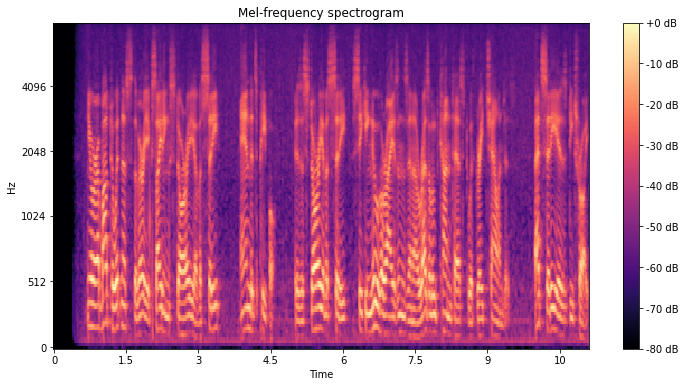

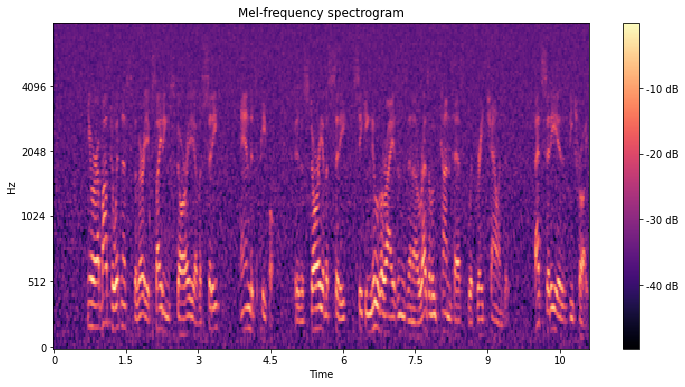

In [ ]:
spectr_mel(y.numpy())
spectr_mel(noisy_y)

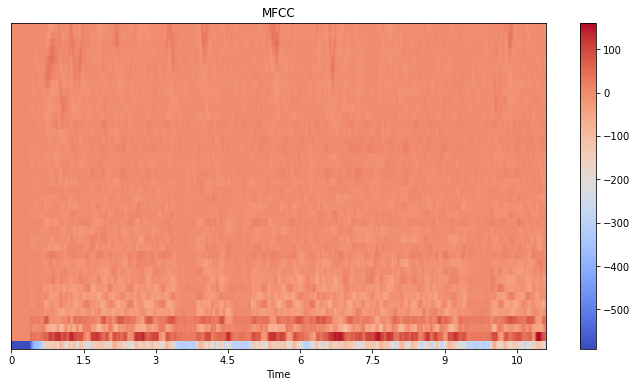

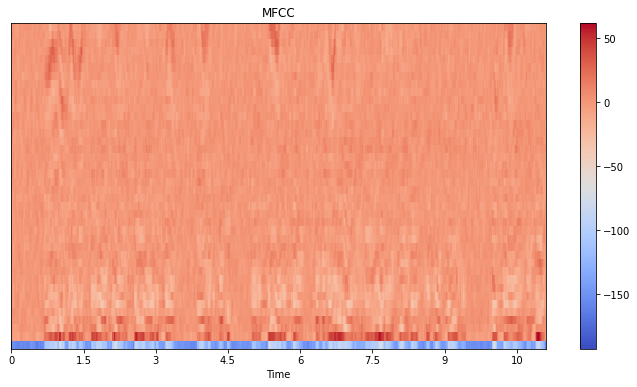

In [ ]:
spectr_mfcc(y.numpy())
spectr_mfcc(noisy_y)

In [ ]:
!pip install nemo_toolkit[all]
!pip install evaluate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Используем nemo-модель для распознования речи

In [ ]:
import nemo.collections.asr as nemo_asr

model = nemo_asr.models.ASRModel.from_pretrained(model_name="stt_en_conformer_ctc_medium")

predict = model.transcribe(paths2audio_files=['1.wav', '2.wav', '3.wav', '4.wav'], logprobs=False)

[NeMo W 2023-03-06 14:18:54 optimizers:55] Apex was not found. Using the lamb or fused_adam optimizer will error out.
[NeMo W 2023-03-06 14:18:54 experimental:27] Module <class 'nemo.collections.asr.models.audio_to_audio_model.AudioToAudioModel'> is experimental, not ready for production and is not fully supported. Use at your own risk.
[NeMo W 2023-03-06 14:18:55 experimental:27] Module <class 'nemo.collections.asr.modules.audio_modules.SpectrogramToMultichannelFeatures'> is experimental, not ready for production and is not fully supported. Use at your own risk.
[NeMo W 2023-03-06 14:18:56 nemo_logging:349] /usr/local/lib/python3.8/dist-packages/torch/jit/annotations.py:309: UserWarning: TorchScript will treat type annotations of Tensor dtype-specific subtypes as if they are normal Tensors. dtype constraints are not enforced in compilation either.
      warnings.warn("TorchScript will treat type annotations of Tensor "
    
[NeMo W 2023-03-06 14:18:56 experimental:27] Module <class 'n

[NeMo I 2023-03-06 14:18:56 cloud:56] Found existing object /root/.cache/torch/NeMo/NeMo_1.15.0/stt_en_conformer_ctc_medium/54700ca38836d6aff9aa8504c6dc49d3/stt_en_conformer_ctc_medium.nemo.
[NeMo I 2023-03-06 14:18:56 cloud:62] Re-using file from: /root/.cache/torch/NeMo/NeMo_1.15.0/stt_en_conformer_ctc_medium/54700ca38836d6aff9aa8504c6dc49d3/stt_en_conformer_ctc_medium.nemo
[NeMo I 2023-03-06 14:18:56 common:913] Instantiating model from pre-trained checkpoint
[NeMo I 2023-03-06 14:18:59 mixins:170] Tokenizer SentencePieceTokenizer initialized with 1024 tokens


[NeMo W 2023-03-06 14:19:00 modelPT:156] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /data/NeMo_ASR_SET/English/v2.0/train/tarred_audio_manifest.json
    sample_rate: 16000
    batch_size: 64
    shuffle: true
    num_workers: 8
    pin_memory: true
    use_start_end_token: false
    trim_silence: false
    max_duration: 20.0
    min_duration: 0.1
    shuffle_n: 2048
    is_tarred: true
    tarred_audio_filepaths: /data/NeMo_ASR_SET/English/v2.0/train/audio__OP_0..4095_CL_.tar
    
[NeMo W 2023-03-06 14:19:00 modelPT:163] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    manifest_filepath:
    - /data/ASR/LibriSpeech/librispeech_withs

[NeMo I 2023-03-06 14:19:00 features:267] PADDING: 0


ERROR:numba.cuda.cudadrv.driver:Call to cuInit results in CUDA_ERROR_NO_DEVICE


[NeMo I 2023-03-06 14:19:01 save_restore_connector:243] Model EncDecCTCModelBPE was successfully restored from /root/.cache/torch/NeMo/NeMo_1.15.0/stt_en_conformer_ctc_medium/54700ca38836d6aff9aa8504c6dc49d3/stt_en_conformer_ctc_medium.nemo.


Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
from evaluate import load

wer = load("wer")
test = []
for i in range(1, 5):
 with open(f'{i}.txt', 'r') as f:
    test.append(f.read())
wer_score = wer.compute(predictions=predict, references=test)
print(f'WER - {wer_score}')

WER - 0.0625
